In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [24]:
num_games = 10000

# Problem 2(a)

In [25]:
class TicTacToe():
  def __init__(self, n):
    self.size = n
    self.board = np.empty((n, n), dtype='U1')
    self.board[:] = ''
    self.player = random.choice(['X', 'O'])
    self.end = False

  def act(self, move):
    if self.board[move] == '':
      self.board[move] = self.player
      if self.player == 'X':
        self.player = 'O'
      else:
        self.player = 'X'
    else:
      print("Move is invalid")

  def print_board(self):
    print(self.board)

  def available_positions(self):
    positions = []
    for i in range(self.size):
      for j in range(self.size):
        if self.board[i, j] == '':
          positions.append((i, j))
    return positions

  def winner(self):

    #Check along rows
    for i in range(self.size):
      if sum(np.char.count(self.board[i, :], 'X')) == self.size:
        self.end = True
        return 'X'
      if sum(np.char.count(self.board[i, :], 'O')) == self.size:
        self.end = True
        return 'O'

    #Check along columns
    for i in range(self.size):
      if sum(np.char.count(self.board[:, i], 'X')) == self.size:
        self.end = True
        return 'X'
      if sum(np.char.count(self.board[:, i], 'O')) == self.size:
        self.end = True
        return 'O'

    #Check along diagonals
    if sum(np.char.count(self.board.diagonal(), 'X')) == self.size:
      self.end = True
      return 'X'
    if sum(np.char.count(self.board.diagonal(), 'O')) == self.size:
      self.end = True
      return 'O'
    if np.sum(np.char.count((self.board[::-1]).diagonal(), 'X')) == self.size:
      self.end = True
      return 'X'
    if np.sum(np.char.count((self.board[::-1]).diagonal(), 'O')) == self.size:
      self.end = True
      return 'O'

    #Tie
    if len(self.available_positions()) == 0:
      self.end = True
      return 0

    self.end = False
    return None

  def reward(self):
    if self.winner() == 'X':
      return 1
    if self.winner() == 'O':
      return -1
    if self.winner() == 0:
      return 0.5
    return 0

  def state(self):
    return str(self.board.reshape(self.size*self.size))



# Problem 2(b)

In [26]:
class random_agent():

  def __init__(self):
    pass

  def policy(self, env):
    actions = env.available_positions()
    return random.choice(actions)

In [27]:
class safe_agent():

  def __init__(self):
    pass

  def policy(self, env):
    actions = env.available_positions()

    #check for win along row
    for i in range(env.size):
      if sum(np.char.count(env.board[i, :], 'X')) == env.size - 1 and sum(np.char.count(env.board[i, :], 'O')) == 0:
        for j in range(env.size):
          if env.board[i, j] == '':
            return (i, j)

    #check for win along column
    for i in range(env.size):
      if sum(np.char.count(env.board[:, i], 'X')) == env.size - 1 and sum(np.char.count(env.board[:, i], 'O')) == 0:
        for j in range(env.size):
          if env.board[j, i] == '':
            return (j, i)

    #check for win along diagonal
    if sum(np.char.count(env.board.diagonal(), 'X')) == env.size - 1 and sum(np.char.count(env.board.diagonal(), 'O')) == 0:
      for i in range(env.size):
        if env.board[i, i] == '':
          return (i, i)

    if sum(np.char.count((env.board[::-1]).diagonal(), 'X')) == env.size - 1 and sum(np.char.count((env.board[::-1]).diagonal(), 'O')) == 0:
      for i in range(env.size):
        if env.board[i, env.size - 1 - i] == '':
          return (i, env.size - 1 - i)

    #check for block along row
    for i in range(env.size):
      if sum(np.char.count(env.board[i, :], 'O')) == env.size - 1 and sum(np.char.count(env.board[i, :], 'X')) == 0:
        for j in range(env.size):
          if env.board[i, j] == '':
            return (i, j)

    #check for block along column
    for i in range(env.size):
      if sum(np.char.count(env.board[:, i], 'O')) == env.size - 1 and sum(np.char.count(env.board[:, i], 'X')) == 0:
        for j in range(env.size):
          if env.board[j, i] == '':
            return (j, i)

    #check for block along diagonal
    if sum(np.char.count(env.board.diagonal(), 'O')) == env.size - 1 and sum(np.char.count(env.board.diagonal(), 'X')) == 0:
      for i in range(env.size):
        if env.board[i, i] == '':
          return (i, i)

    if sum(np.char.count((env.board[::-1]).diagonal(), 'O')) == env.size - 1 and sum(np.char.count((env.board[::-1]).diagonal(), 'X')) == 0:
      for i in range(env.size):
        if env.board[i, env.size - 1 - i] == '':
          return (i, env.size - 1 - i)

    #If there are no winning or blocking moves, it picks a random action
    return random.choice(actions)



In [28]:
class QlearningAgent():

  def __init__(self):
    self.alpha = 0.01
    self.gamma = 0.9
    self.epsilon = 0.05
    self.Q_table = {}

  def policy(self, env):
    s = env.state()
    actions = env.available_positions()
    max_value = max([self.Q(s, a) for a in actions])
    max_actions = [a for a in actions if self.Q(s,a) == max_value]
    return random.choice(max_actions)

  def choose_action(self, env):
    p = random.random()
    actions = env.available_positions()
    if p <= self.epsilon:
      return random.choice(actions)
    return self.policy(env, actions)

  def Q(self, s, a):
    if (s, a) in self.Q_table:
      return self.Q_table[(s, a)]
    else:
      self.Q_table[(s, a)] = 0
    return self.Q_table[(s, a)]

  def update_Q(self, env, s1, a1, s2):

    actions = env.available_positions()
    reward = env.reward()

    if len(actions) == 0:
      max_value = 0
    else:
      max_val = max([self.Q(s2, a) for a in actions])

    self.Q_table[(s1, a1)] = self.Q_table[(s1, a1)] + self.alpha*(reward + self.gamma*max_val - self.Q_table[(s1, a1)])



In [29]:
def train(agent, opponents):
  opponent = random.choice(opponents)
  num_train_wins = []

  for i in range(num_games):
    env = TicTacToe(3)
    if(env.player == 'X'):
      player1 = agent
      player2 = opponent
    else:
      player1 = opponent
      player2 = agent

    while not env.end:
      s1 = env.state()
      a_p1 = player1.policy(env)
      env.act(a_p1)

      winner = env.winner()
      if winner == None:
        a_p2 = player2.policy(env)
        env.act(a_p2)
        if (player1 == agent):
          a = a_p1
        else:
          a = a_p2
        s2 = env.state()
        agent.update_Q(env, s1, a, s2)
        winner = env.winner()

    if(i % 200 == 0):
      win_count = test(agent, opponent, 100)
      print(f'Epoch:{i/200} - Wins:{win_count}')
      num_train_wins.append(win_count)

  return agent, num_train_wins


In [30]:
def test(agent, opponent, num_games):
    num_wins = 0
    for i in range(num_games):
        env = TicTacToe(3)
        agent = QlearningAgent()
        agent.epsilon = 0
        agent.Q_table = agent.Q_table

        if(env.player == 'X'):
            player1 = agent
            player2 = opponent
        else:
            player1 = opponent
            player2 = agent

        while not env.end:
            a_p1 = player1.policy(env)
            env.act(a_p1)

            winner = env.winner()
            if winner == None:
                a_p2 = player2.policy(env)
                env.act(a_p2)
                winner = env.winner()

        if(env.winner() == 'X'):
          num_wins += 1

    return num_wins

Epoch:0.0 - Wins:37
Epoch:1.0 - Wins:47
Epoch:2.0 - Wins:41
Epoch:3.0 - Wins:41
Epoch:4.0 - Wins:47
Epoch:5.0 - Wins:42
Epoch:6.0 - Wins:38
Epoch:7.0 - Wins:38
Epoch:8.0 - Wins:39
Epoch:9.0 - Wins:51
Epoch:10.0 - Wins:44
Epoch:11.0 - Wins:41
Epoch:12.0 - Wins:38
Epoch:13.0 - Wins:51
Epoch:14.0 - Wins:50
Epoch:15.0 - Wins:34
Epoch:16.0 - Wins:39
Epoch:17.0 - Wins:40
Epoch:18.0 - Wins:39
Epoch:19.0 - Wins:39
Epoch:20.0 - Wins:46
Epoch:21.0 - Wins:45
Epoch:22.0 - Wins:40
Epoch:23.0 - Wins:50
Epoch:24.0 - Wins:49
Epoch:25.0 - Wins:52
Epoch:26.0 - Wins:51
Epoch:27.0 - Wins:44
Epoch:28.0 - Wins:46
Epoch:29.0 - Wins:42
Epoch:30.0 - Wins:40
Epoch:31.0 - Wins:45
Epoch:32.0 - Wins:46
Epoch:33.0 - Wins:55
Epoch:34.0 - Wins:43
Epoch:35.0 - Wins:42
Epoch:36.0 - Wins:47
Epoch:37.0 - Wins:44
Epoch:38.0 - Wins:38
Epoch:39.0 - Wins:36
Epoch:40.0 - Wins:33
Epoch:41.0 - Wins:47
Epoch:42.0 - Wins:45
Epoch:43.0 - Wins:44
Epoch:44.0 - Wins:40
Epoch:45.0 - Wins:44
Epoch:46.0 - Wins:44
Epoch:47.0 - Wins:41
Ep

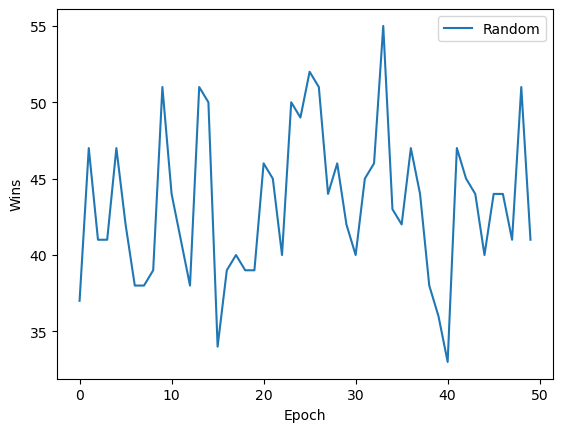

Wins against random agent:  415
Wins against safe agent:  108


In [31]:
env = TicTacToe(3)

opponent = random_agent()
agent = QlearningAgent()
agent, wins = train(agent, [opponent])

epochs = np.arange(0,50)
plt.plot(epochs, wins, label = "Random")
plt.xlabel("Epoch")
plt.ylabel("Wins")
plt.legend()
plt.show()

test1 = random_agent()
count = 0
for i in range(1000):
    count += test(agent, test1, 1)
print('Wins against random agent: ', count)


test2 = safe_agent()
count = 0
for i in range(1000):
    count += test(agent, test2, 1)
print('Wins against safe agent: ', count)

Epoch:0.0 - Wins:11
Epoch:1.0 - Wins:12
Epoch:2.0 - Wins:6
Epoch:3.0 - Wins:20
Epoch:4.0 - Wins:13
Epoch:5.0 - Wins:19
Epoch:6.0 - Wins:12
Epoch:7.0 - Wins:12
Epoch:8.0 - Wins:11
Epoch:9.0 - Wins:10
Epoch:10.0 - Wins:13
Epoch:11.0 - Wins:9
Epoch:12.0 - Wins:6
Epoch:13.0 - Wins:9
Epoch:14.0 - Wins:7
Epoch:15.0 - Wins:13
Epoch:16.0 - Wins:9
Epoch:17.0 - Wins:7
Epoch:18.0 - Wins:13
Epoch:19.0 - Wins:9
Epoch:20.0 - Wins:13
Epoch:21.0 - Wins:7
Epoch:22.0 - Wins:10
Epoch:23.0 - Wins:16
Epoch:24.0 - Wins:11
Epoch:25.0 - Wins:9
Epoch:26.0 - Wins:10
Epoch:27.0 - Wins:6
Epoch:28.0 - Wins:16
Epoch:29.0 - Wins:10
Epoch:30.0 - Wins:10
Epoch:31.0 - Wins:16
Epoch:32.0 - Wins:8
Epoch:33.0 - Wins:10
Epoch:34.0 - Wins:18
Epoch:35.0 - Wins:19
Epoch:36.0 - Wins:7
Epoch:37.0 - Wins:12
Epoch:38.0 - Wins:10
Epoch:39.0 - Wins:13
Epoch:40.0 - Wins:12
Epoch:41.0 - Wins:12
Epoch:42.0 - Wins:7
Epoch:43.0 - Wins:11
Epoch:44.0 - Wins:11
Epoch:45.0 - Wins:11
Epoch:46.0 - Wins:14
Epoch:47.0 - Wins:11
Epoch:48.0 - Win

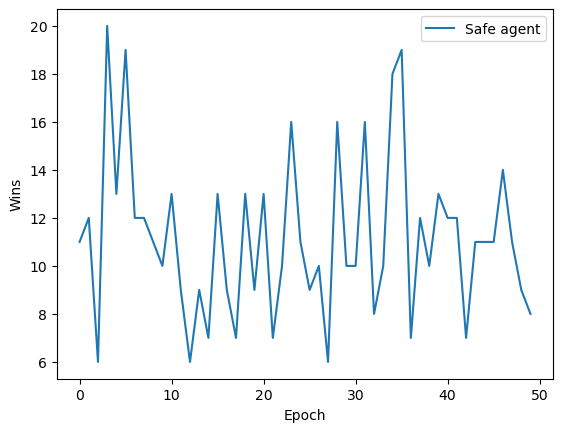

Wins against Random agent:  432
Wins against Safe agent:  113


In [32]:
env = TicTacToe(3)

opponent = safe_agent()
agent = QlearningAgent()
agent, wins = train(agent, [opponent])

plt.plot(epochs, wins, label = "Safe agent")
plt.xlabel("Epoch")
plt.ylabel("Wins")
plt.legend()
plt.show()

test1 = random_agent()
count = 0
for i in range(1000):
    count += test(agent, test1, 1)
print('Wins against Random agent: ', count)

test2 = safe_agent()
count = 0
for i in range(1000):
    count += test(agent, test2, 1)
print('Wins against Safe agent: ', count)

Epoch:0.0 - Wins:12
Epoch:1.0 - Wins:14
Epoch:2.0 - Wins:5
Epoch:3.0 - Wins:13
Epoch:4.0 - Wins:15
Epoch:5.0 - Wins:11
Epoch:6.0 - Wins:13
Epoch:7.0 - Wins:11
Epoch:8.0 - Wins:11
Epoch:9.0 - Wins:18
Epoch:10.0 - Wins:9
Epoch:11.0 - Wins:7
Epoch:12.0 - Wins:13
Epoch:13.0 - Wins:11
Epoch:14.0 - Wins:7
Epoch:15.0 - Wins:6
Epoch:16.0 - Wins:13
Epoch:17.0 - Wins:9
Epoch:18.0 - Wins:11
Epoch:19.0 - Wins:8
Epoch:20.0 - Wins:6
Epoch:21.0 - Wins:5
Epoch:22.0 - Wins:8
Epoch:23.0 - Wins:10
Epoch:24.0 - Wins:16
Epoch:25.0 - Wins:14
Epoch:26.0 - Wins:15
Epoch:27.0 - Wins:10
Epoch:28.0 - Wins:15
Epoch:29.0 - Wins:9
Epoch:30.0 - Wins:12
Epoch:31.0 - Wins:12
Epoch:32.0 - Wins:14
Epoch:33.0 - Wins:5
Epoch:34.0 - Wins:11
Epoch:35.0 - Wins:5
Epoch:36.0 - Wins:14
Epoch:37.0 - Wins:9
Epoch:38.0 - Wins:13
Epoch:39.0 - Wins:13
Epoch:40.0 - Wins:16
Epoch:41.0 - Wins:18
Epoch:42.0 - Wins:11
Epoch:43.0 - Wins:12
Epoch:44.0 - Wins:10
Epoch:45.0 - Wins:7
Epoch:46.0 - Wins:9
Epoch:47.0 - Wins:12
Epoch:48.0 - Wins:

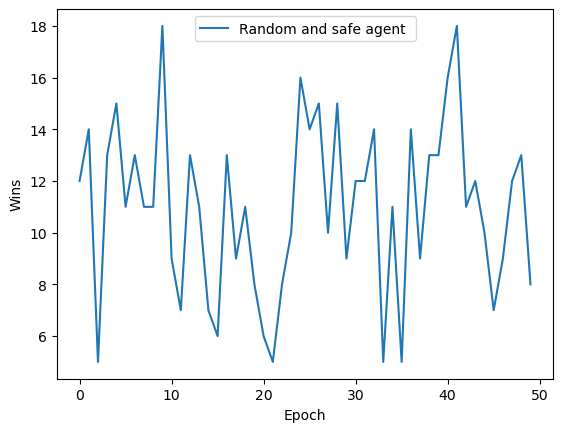

Wins against Random agent:  420
Wins against Safe agent:  104


In [33]:
env = TicTacToe(3)

opponent1 = random_agent()
opponent2 = safe_agent()
agent = QlearningAgent()
agent, wins = train(agent, [opponent1, opponent2])

epochs = np.arange(0,50)
plt.plot(epochs, wins, label = "Random and safe agent ")
plt.xlabel("Epoch")
plt.ylabel("Wins")
plt.legend()
plt.show()

random_agent_test = random_agent()
count = 0
for i in range(1000):
    count += test(agent, random_agent_test, 1)
print('Wins against Random agent: ', count)


safe_agent_test = safe_agent()
count = 0
for i in range(1000):
    count += test(agent, safe_agent_test, 1)
print('Wins against Safe agent: ', count)

**(4)** Among the above three developed agents, the third agent which is trained by both random and safe agent is the best (which obviously is better that the agents which are trained by either one of them)
This is beacause it is trained against all possible random and safe moves making it more robust.

**(5)** The Q-learning agent developed isn't unbeatable as we can see from the non-zero number of losses in the games.But, the agent can be improved by
- increasing the number of training epochs
- optimizing the hyperparameters.

In [50]:
import numpy as np

class TicTacToeEnvironment:
    def __init__(self):
        # Initialize an empty 3x3 board with all spaces as '-'
        self.board = np.array([['-' for _ in range(3)] for _ in range(3)])
        
        # Assign player symbols
        self.agent_symbol = 'X'
        self.opponent_symbol = 'O'
        
        # Determine who starts the game (agent always starts)
        self.current_player = self.agent_symbol

    def is_valid_move(self, row, col):
        # Check if the given move is within the bounds and the cell is empty
        return 0 <= row < 3 and 0 <= col < 3 and self.board[row, col] == '-'

    def act(self, row, col):
        # Check if the move is valid
        if self.is_valid_move(row, col):
            # Place the agent's symbol on the board
            self.board[row, col] = self.agent_symbol
            self.current_player = self.opponent_symbol
            return True
        else:
            return False

    def print_board(self):
        # Print the current board position
        for row in self.board:
            print(" ".join(row))
        print()

    def check_winner(self):
        # Check for a winner (3 in a row horizontally, vertically, or diagonally)
        for player in [self.agent_symbol, self.opponent_symbol]:
            # Check rows and columns
            for i in range(3):
                if (self.board[i] == [player] * 3).all() or (self.board[:, i] == [player] * 3).all():
                    return player
            # Check diagonals
            if (np.diag(self.board) == [player] * 3).all() or (np.diag(np.fliplr(self.board)) == [player] * 3).all():
                return player
        # Check for a tie
        if '-' not in self.board:
            return 'Tie'
        # Game is still ongoing
        return None

    def reset(self):
        # Reset the game to the initial state
        self.board = np.array([['-' for _ in range(3)] for _ in range(3)])
        self.current_player = self.agent_symbol

In [51]:
import random

class RandomAgent:
    def select_move(self, env):
        # Get a list of valid moves (empty squares)
        valid_moves = [(row, col) for row in range(3) for col in range(3) if env.is_valid_move(row, col)]
        
        # Randomly select one move from the list of valid moves
        return random.choice(valid_moves)


In [52]:
class SafeAgent:
    def select_move(self, env):
        # Get a list of valid moves (empty squares)
        valid_moves = [(row, col) for row in range(3) for col in range(3) if env.is_valid_move(row, col)]
        
        # Check for a winning move first
        for move in valid_moves:
            row, col = move
            # Make a hypothetical move to check for a win
            env.act(row, col)
            if env.check_winner() == env.agent_symbol:
                env.reset()
                return move
            env.board[row, col] = '-'  # Reset the board

        # If no winning move, check for a blocking move
        for move in valid_moves:
            row, col = move
            # Make a hypothetical move for the opponent and check if it prevents a win
            env.act(row, col)
            if env.check_winner() == env.opponent_symbol:
                env.reset()
                return move
            env.board[row, col] = '-'  # Reset the board

        # If no winning or blocking move, behave like a random agent
        return random.choice(valid_moves)


ValueError: x and y must have same first dimension, but have shapes (51,) and (10,)

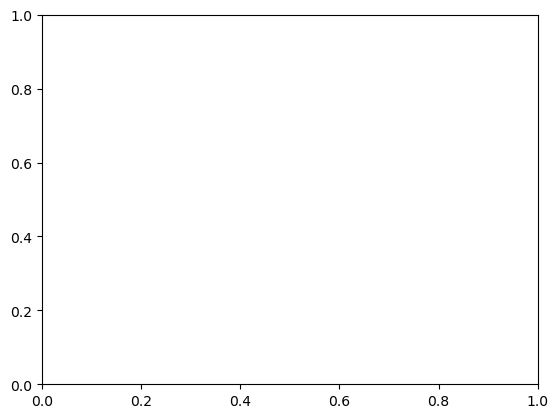

In [54]:

import matplotlib.pyplot as plt

# Assuming the training and testing process is done and the results are stored in the following lists
training_epochs = list(range(0, 10001, 200))
random_opponent_wins = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
safe_opponent_wins = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Plot the training progress graph
plt.plot(training_epochs, random_opponent_wins, label='Random Opponent')
plt.plot(training_epochs, safe_opponent_wins, label='Safe Opponent')
plt.xlabel('Training Epochs')
plt.ylabel('Number of Wins')
plt.title('Training Progress Graph')
plt.legend()
plt.show()